# Basics of spike train analysis

This is the first part of the course. 

**You will learn to:** 
- Explore spike trains and analyze their statistics.
- Plot stuff.

Let's first import the packages we are going to use, and set up some plotting parameters.

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import spkbasic
from os import listdir
from os.path import isfile, join

%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 6.0) # set default size of plots

## 1 - Loading and plotting spike trains

Let's begin by loading

### Loading single and multiple spike trains

In [2]:
spike_file = open('example_spikes.txt')
spike_times = np.array([float(line) for line in spike_file])
spike_file.close()

The file above contains the spike train of a single neuron in s.

In [3]:
print(spike_times)

[  0.6788   0.6822   0.692  ... 487.7582 487.7666 487.7752]


**Exercise:** Since we are going to use loading of spike trains often, we will make a function out of it. This exercise should also test your basic understanding of functions. Try to fill `loadSpikeTrain()`:

In [4]:
def loadSpikeTrain(pathToSpikeTrain):
    '''
    Inputs:
            pathToSpikeTrain: string
    Outputs: 
            spike_times: numpy array
    '''
    
    ### START CODE HERE ### (approx. 3 lines)
    spike_file = open(pathToSpikeTrain)
    spike_times = np.array([float(line) for line in spike_file])
    spike_file.close()
    ### END CODE HERE ###
    
    return spike_times;

In [50]:
print(loadSpikeTrain('spike_trains/18_SP_C203.txt'))

[  0.5766   2.8239   4.5523 ... 481.387  482.4371 482.4677]


Expected output: 
[  0.5766   2.8239   4.5523 ... 481.387  482.4371 482.4677]

It is also useful to load multiple spike trains in our workspace. One can stack them in a list, or numpy array.

**Exercise:** 

*Hint:* Make use of `loadSpikeTrain()` that we defined above!

### Raster plots for spike train visualization

An useful function for plotting spike trains is eventplot

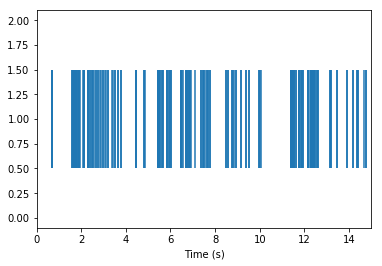

In [42]:
plt.eventplot(spike_times);
plt.xlim([0,15]);
plt.xlabel('Time (s)');

It is possible to use eventplot to stack spike trains on top of one another. Can you plot the spike trains of five neurons?

In [36]:
mypath='spike_trains/';
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))];

spks=loadSpikeTrain(mypath+onlyfiles[0]);
ii=0;
all_trains=[];
for pathfile in onlyfiles[:5]:
    spks=loadSpikeTrain(mypath+pathfile);
    all_trains.append(spks)


In [37]:
def plotMultipleTrains(spkTrainList):
    ### START CODE HERE ### (approx. 4 lines)
    
    plt.eventplot(np.array(all_trains));
    plt.xlim([0,25]);
    ### END CODE HERE ###
    return;

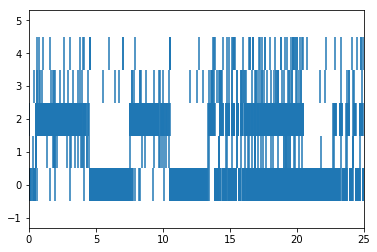

In [38]:
plotMultipleTrains(all_trains)

Although spike times are very intuitive and easy to handle, we can run to problems. For that reason, we will introduce an alternative representation of spike trains.

## 2 - Binning spike trains

Spike trains almost never contain the same number of events. This fact makes their manipulation for plotting and analysis harder.

### Spike trains as discrete events

You can bin the spike trains of multiple neurons at once.

In [47]:
bins=np.arange(0,15,0.01)
finds=np.digitize(spike_times,bins);
frate = [spike_times[finds == i].sum() for i in range(1, len(bins))]
finds


array([  68,   69,   70, ..., 1500, 1500, 1500], dtype=int64)

### Firing rates

**Exercise:** Bin the spike times in 10 ms bins.

**Exercise:** Did the drug significantly alter the firing rate?

## 3 - Spike train statistics

By looking at statistical properties of spike trains, we can extract useful information.

### Interspike interval histogram

Below, you see the interspike interval histogram of a single neuron:

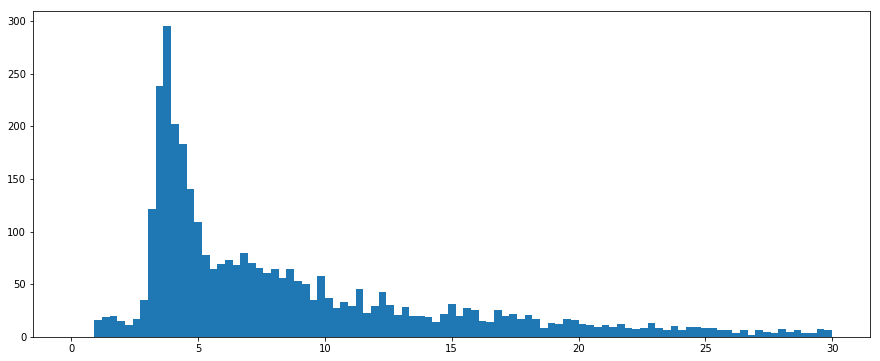

In [46]:
plt.hist(np.diff(spike_times)*1e3,np.linspace(0,30,100));

**Exercise:** Try to reproduce such a histogram by filling `plotIsiHistogram()` below. The functions `np.diff` and `plt.hist` might help you

In [65]:
def plotIsiHistogram(spiketrain):
    ### START CODE HERE ### (approx. 2 lines)
    plt.hist(np.diff(spiketrain)*1e3,np.linspace(0,30,100));
    ### END CODE HERE ###

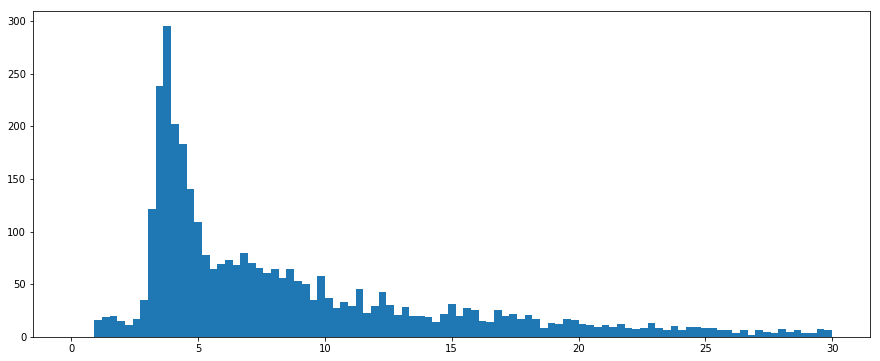

In [66]:
plotIsiHistogram(spike_times)

**Exercise:** Estimate the % of intervals that are below 2 ms by filling in `percentIntervals(spike_train)`

In [58]:
def percentIntervals(spiketrain,timeval):
    ### START CODE HERE ### (approx. 2 lines)
    spdiffs=np.diff(spiketrain)*1e3;
    pint=np.sum(spdiffs<timeval)/np.size(spiketrain)
    ### END CODE HERE ###
    return pint

In [61]:
print("ISIs below 2 ms are " + str(100*percentIntervals(spike_times,2)) + "%")

ISIs below 2 ms are 1.1500649230198479%


**Expected output:**
1.15 %

### Autocorrelogram

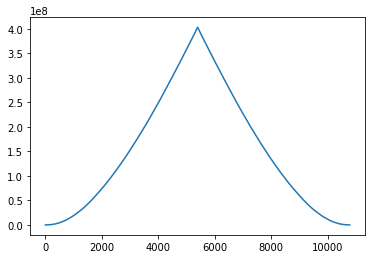

In [25]:
cres=np.correlate(spike_times,spike_times,mode='full')
plt.plot(cres)

### Crosscorrelogram